### NLP - Part 2
### Renan Peneluppi
### Data Science

In [160]:
#import packages I will likely need for this assigment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [312]:
#Get my trainning data
Train = pd.read_csv('data/train_dataframe.csv')

In [313]:
#Get my test data
Test = pd.read_csv('data/test_dataframe.csv')

In [163]:
#Check out what columns we have
columlist = Train.columns

columlist

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review',
       'lat', 'lng', 'Review_Month',
       ...
       'p_working', 'p_world', 'p_worth', 'p_wouldn', 'p_year', 'p_years',
       'p_yes', 'p_young', 'p_yummy', 'Reviewer_Score'],
      dtype='object', length=2587)

In [164]:
#take a quick look at the numbers
Train.head()
#This will need scaling

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,Review_Day,Review_Year,Hotel_Name_11 Cadogan Gardens,Hotel_Name_41,Hotel_Name_45 Park Lane Dorchester Collection,Hotel_Name_88 Studios,Hotel_Name_Ace Hotel London Shoreditch,Hotel_Name_Adria Boutique Hotel,Hotel_Name_Aloft London Excel,Hotel_Name_Amba Hotel Charing Cross,Hotel_Name_Amba Hotel Marble Arch,Hotel_Name_Ambassadors Bloomsbury,Hotel_Name_Andaz London Liverpool Street,Hotel_Name_Apex City Of London Hotel,Hotel_Name_Apex London Wall Hotel,Hotel_Name_Apex Temple Court Hotel,Hotel_Name_Arbor City,Hotel_Name_Arbor Hyde Park,Hotel_Name_Ashburn Hotel,Hotel_Name_Avo Hotel,Hotel_Name_BEST WESTERN Maitrise Hotel Maida Vale,Hotel_Name_Baglioni Hotel London The Leading Hotels of the World,Hotel_Name_Batty Langley s,Hotel_Name_Bentley London,Hotel_Name_Bermondsey Square Hotel A Bespoke Hotel,Hotel_Name_Best Western Maitrise Hotel Edgware Road,Hotel_Name_Best Western Mornington Hotel Hyde Park,Hotel_Name_Best Western PLUS Epping Forest,Hotel_Name_Best Western Palm Hotel,Hotel_Name_Best Western Plus Seraphine Hammersmith Hotel,Hotel_Name_Best Western Seraphine Kensington Olympia,Hotel_Name_Best Western The Boltons Hotel London Kensington,Hotel_Name_Blakemore Hyde Park,Hotel_Name_Blakes Hotel,Hotel_Name_Bloomsbury Palace Hotel,Hotel_Name_Boundary Rooms Suites,Hotel_Name_Britannia International Hotel Canary Wharf,Hotel_Name_Bulgari Hotel London,Hotel_Name_COMO Metropolitan London,Hotel_Name_COMO The Halkin,Hotel_Name_Caesar Hotel,Hotel_Name_Canary Riverside Plaza Hotel,Hotel_Name_Charlotte Street Hotel,Hotel_Name_Chiswick Rooms,Hotel_Name_Claridge s,Hotel_Name_Clayton Crown Hotel London,Hotel_Name_Clayton Hotel Chiswick,Hotel_Name_Club Quarters Hotel Gracechurch,Hotel_Name_Club Quarters Hotel Lincoln s Inn Fields,Hotel_Name_Club Quarters Hotel St Paul s,Hotel_Name_Club Quarters Hotel Trafalgar Square,Hotel_Name_Comfort Inn Suites Kings Cross St Pancras,Hotel_Name_Commodore Hotel,Hotel_Name_Conrad London St James,Hotel_Name_Copthorne Tara Hotel London Kensington,Hotel_Name_Corinthia Hotel London,Hotel_Name_Corus Hotel Hyde Park,Hotel_Name_Courthouse Hotel London,Hotel_Name_Courthouse Hotel Shoreditch,Hotel_Name_Covent Garden Hotel,Hotel_Name_Crowne Plaza London Battersea,Hotel_Name_Crowne Plaza London Docklands,Hotel_Name_Crowne Plaza London Ealing,Hotel_Name_Crowne Plaza London Kensington,Hotel_Name_Crowne Plaza London Kings Cross,Hotel_Name_Crowne Plaza London The City,Hotel_Name_Danubius Hotel Regents Park,Hotel_Name_De Vere Devonport House,Hotel_Name_Dorset Square Hotel,Hotel_Name_Dorsett Shepherds Bush,Hotel_Name_DoubleTree By Hilton London Excel,Hotel_Name_DoubleTree by Hilton Hotel London Marble Arch,Hotel_Name_DoubleTree by Hilton Hotel London Tower of London,Hotel_Name_DoubleTree by Hilton London Chelsea,Hotel_Name_DoubleTree by Hilton London Docklands Riverside,Hotel_Name_DoubleTree by Hilton London Ealing,Hotel_Name_DoubleTree by Hilton London Hyde Park,Hotel_Name_DoubleTree by Hilton London Islington,Hotel_Name_DoubleTree by Hilton London Victoria,Hotel_Name_DoubleTree by Hilton London West End,Hotel_Name_DoubleTree by Hilton London Westminster,Hotel_Name_Doubletree By Hilton London Greenwich,Hotel_Name_Doubletree by Hilton London Kensington,Hotel_Name_Draycott Hotel,Hotel_Name_Durrants Hotel,Hotel_Name_Eccleston Square Hotel,Hotel_Name_Egerton House,Hotel_Name_Fielding Hotel,Hotel_Name_Fifty Four Boutique Hotel,Hotel_Name_Flemings Mayfair,Hotel_Name_Four Seasons Hotel London at Park Lane,Hotel_Name_Gainsborough Hotel,Hotel_Name_Georgian House Hotel,Hotel_Name_Good Hotel London,Hotel_Name_Goodenough Club,Hotel_Name_Grand Royale London Hyde Park,Hotel_Name_Grange Beauchamp Hotel,Hotel_Name_Grange Blooms Hotel,Hotel_Name_Grange Buckingham Hotel,Hotel_Name_Grange City Hotel,Hotel_Name_Grange Clarendon Hotel,Hot

In [165]:
#increas number of columns that can be displayed
pd.set_option('display.max_columns', 500)

In [166]:
#check what the reviewer scores looks like
Train['Reviewer_Score']

#this will be my target

0        1.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
13646    0.0
13647    1.0
13648    1.0
13649    0.0
13650    1.0
Name: Reviewer_Score, Length: 13651, dtype: float64

In [167]:
#Just double check the data dimension
print(f'train shape : {Train.shape}')
print(f'train nulls : {Test.shape}')


train shape : (13651, 2587)
train nulls : (3413, 2587)


#### Part 1 -  Employ a linear classifier on this dataset:

##### Fit a logistic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [168]:
#import package
import statsmodels.api as sm

In [169]:
# First I must define my X_train and Y_train 
#For now I'm keeping the full train data

# Since I already have a split of test and train from the files I can use Train data to split
# Train split will be a train and validation set, test data will provide the actual test data.

y_train = Train['Reviewer_Score']#only my target
X_train = Train.drop('Reviewer_Score', axis=1)#only the numerical features excluding the target
y_test = Test['Reviewer_Score']
X_test = Test.drop('Reviewer_Score', axis=1)

# adding the column of ones
X_withconstant_train = sm.add_constant(X_train)

In [170]:
#Check proportion of my target
y_train.value_counts()/len(y_train)

1.0    0.58113
0.0    0.41887
Name: Reviewer_Score, dtype: float64

In [171]:
# Scale my data - I will try diferent scalers

from sklearn.preprocessing import StandardScaler

# Instantiate the the scaler
my_standard_scaler = StandardScaler()

# Fit scaler
my_standard_scaler.fit(X_train)

# Transform data - 
X_train = my_standard_scaler.transform(X_train)
X_test = my_standard_scaler.transform(X_test)

In [172]:
#Lets build a Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
my_log= LogisticRegression(solver='lbfgs')

# Fit the model
my_log = my_log.fit(X_train, y_train)

#Predict/Score
train_score_log = my_log.score(X_train,y_train)
test_score_log = my_log.score(X_test,y_test)

#### Question 1.1 
Fit a logistic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [173]:
print(f'Train data score:  {train_score_log:.2f}')
print(f'Test data Score:  {test_score_log:.2f}', '\n')

Train data score:  0.87
Test data Score:  0.75 



### Q1 .2 
What are the 20 words most associated with a good review? What are the 20 words most associated with a bad review? Use the regression coefficients to answer this question

In [174]:
from sklearn import metrics


In [175]:
#I have the Coeficients
coefs=my_log.coef_
coefs

array([[-0.01133513,  0.41712753, -0.08882085, ...,  0.03822854,
         0.0747415 ,  0.0529678 ]])

In [176]:
# and targets
my_log.classes_

array([0., 1.])

In [177]:
#I need to identify each of them

In [178]:
head = Train.drop('Reviewer_Score', axis=1).columns
head

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review',
       'lat', 'lng', 'Review_Month',
       ...
       'p_worked', 'p_working', 'p_world', 'p_worth', 'p_wouldn', 'p_year',
       'p_years', 'p_yes', 'p_young', 'p_yummy'],
      dtype='object', length=2586)

In [179]:
# This helped me a little
# https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

In [180]:
coefscore = pd.DataFrame(coefs, columns=[head])
coefscoere = coefscore.transpose()

In [181]:
coefscoere.columns=['Score']

In [182]:
coefscoere = coefscoere.reset_index()

In [183]:
coefscoere.columns=['Token','Score']

In [184]:
# A dataframe with my coeficients and header names
coefscoere

,Token,Score
0,Additional_Number_of_Scoring,-0.011335
1,Average_Score,0.417128
2,Review_Total_Negative_Word_Counts,-0.088821
3,Total_Number_of_Reviews,-0.016027
4,Review_Total_Positive_Word_Counts,0.102169
...,...,...
2581,p_year,0.094706
2582,p_years,0.084629
2583,p_yes,0.038229
2584,p_young,0.074741


In [185]:
# I want to make sure I only use the words from the reviews and not othere features
# I noticed the tokens are identified with a "p_" and "n_" when they come from reviews.

P_tokens = coefscoere[coefscoere['Token'].str.startswith('p_', na=False)]
N_tokens = coefscoere[coefscoere['Token'].str.startswith('n_', na=False)]

In [186]:
# Combine all my tokens as they all influence the outcome
Token_list=P_tokens.append(N_tokens, ignore_index=True)

In [187]:
#Top 20 positive outcomes coeficients
Token_list.nlargest(20,'Score')


,Token,Score
818,p_truly,0.362584
421,p_kindly,0.329085
26,p_amazing,0.310931
262,p_excellent,0.292555
520,p_movies,0.282158
615,p_professional,0.276714
1562,n_loved,0.266326
353,p_half,0.266018
323,p_future,0.264394
406,p_ironing,0.238970


In [188]:
#Top 20 negative outcome coeficients
Token_list.nsmallest(20,'Score')


,Token,Score
1029,n_black,-0.898809
1754,n_premier,-0.403465
1492,n_joke,-0.402323
1514,n_lamp,-0.373563
1850,n_room,-0.371637
1965,n_staff,-0.304271
1710,n_peeling,-0.270779
1237,n_dirty,-0.269847
1854,n_rude,-0.248320
2162,n_won,-0.246730


In the case of this data we are only categorizing the outcomes as 0 and 1. 
Thinking of the sigmoid curve the coeficients scores that are higher will push the prediction to 1, while the lowest ones will push it to 0. So the top and bottom coeficient scores aswer the question of influence over the outcome. 

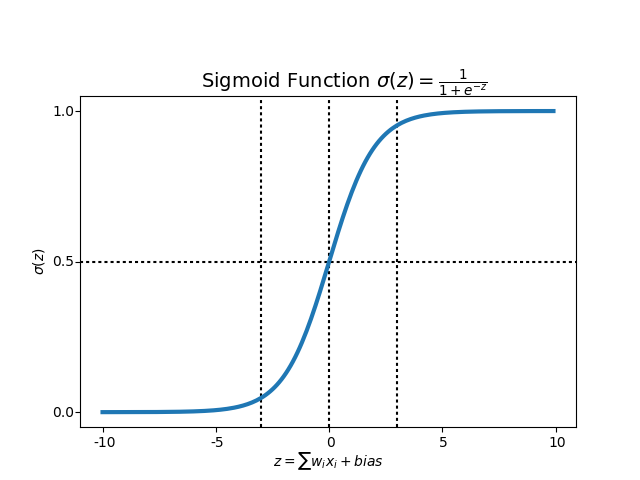

### Reduce the dimensionality of the dataset using PCA, what does reducing the dimensionality do to the computation time and why?

-  PCA requires scaled data, I algeady have X and Y scaled above
 - PCA - Principal Component Analysis  - will reduce the demensions of the dataset.
     - In this case our Dataset has ove 2,000 columns. Using PCA we can just reduce this to 100 or 2 and use the data that acctually matters to our targets.
     - PCA is usefull in identifying outliers in data with so many dimensions that we can't just catcth them by looking at it. 
     - In addition we can transform with PCA to get 2 dimensions and be able to plot the data, for example. 

In [189]:
#Apply PCA

#import PCA
from sklearn.decomposition import PCA
#Define dimension with n_components
pca = PCA(n_components=50)

#Fit to model 
principalComponents = pca.fit_transform(X_train)

#set a new dataframe ang get y_train so that we have the full data frame with the outcomes
principalDf = pd.DataFrame(data = principalComponents)

In [190]:
principalDf['outcome'] = y_train

In [191]:
principalDf
# Now we have less dimensions, but we can't really tell what features actually influence the outcome. 
# This should reduce computing time by a lot. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,outcome
0,-0.501952,0.185268,0.965809,-0.350409,0.023102,2.666437,0.347907,-0.714312,-1.948266,0.371379,0.319666,-2.646743,-2.280676,3.546442,0.748793,1.134908,-1.273225,-1.154898,0.109690,-1.987096,1.408320,-0.525252,-0.563914,-2.036286,-1.121287,1.501248,-3.411293,-2.145837,0.614956,2.217031,2.667905,1.534720,-0.431746,-2.954041,0.888221,2.163716,0.310159,0.511883,1.653914,0.702345,1.482519,1.488208,1.677103,1.480976,-1.791278,-0.191215,-0.433460,2.747188,-0.854781,0.238418,1.0
1,-1.407359,1.656186,-0.803798,1.404911,0.019826,-0.040779,0.661209,0.395213,-1.340164,-1.937948,-3.414907,-1.116372,-0.864291,1.158784,0.234542,-0.363311,-0.199736,-0.586121,-1.283512,1.231120,0.045854,1.522950,1.001699,1.943022,-1.587054,3.003428,2.713629,0.370718,0.330641,0.644263,1.052061,-0.661181,-0.075333,-0.324337,-1.321222,0.380270,0.581472,0.184571,-1.181732,-1.040584,-1.204905,1.260903,-1.367143,1.023324,-2.357723,-0.596652,0.232062,1.408510,-1.410932,-2.924981,1.0
2,4.423395,1.283201,-0.096187,-3.000128,0.984576,2.038047,0.195147,-2.518422,3.097722,-1.715792,-1.697389,3.063929,-0.955557,-0.021864,0.167459,-0.682140,1.411425,1.699228,-0.962316,-0.090631,-0.078491,0.313006,-1.031538,1.200121,1.866874,-2.118491,-0.065937,2.483040,0.269470,0.550426,-0.909225,0.974871,0.072728,-3.652887,-1.029262,2.696448,1.568416,1.548131,1.146197,2.129829,-0.883862,2.176954,1.137428,1.140067,-3.526701,3.363021,0.599200,-4.523519,-0.122192,-0.193512,0.0
3,0.265004,-1.082501,-1.659324,-2.476561,-0.848755,-1.145079,-0.981047,-0.727266,1.778915,-1.593774,-0.075521,-0.188298,1.509480,-0.145275,1.827697,-0.509205,2.845081,-0.413464,-2.121048,-2.064366,1.658095,-2.278881,-2.395198,-0.095756,-0.086454,-0.683769,-0.791303,-1.105046,1.006705,-2.583183,0.698379,-1.313853,-1.985677,-0.064724,-3.643048,0.779573,-1.841576,1.452386,-0.291319,2.379891,-0.889297,0.222792,1.090097,0.071654,-2.553881,0.578096,0.547960,1.272010,-0.034965,0.605577,1.0
4,2.415512,-2.691144,0.550939,-1.366905,0.537986,0.672553,-0.147352,1.114395,-0.150589,0.977723,1.519474,-0.139902,-1.551824,0.613410,-1.716362,-0.077491,0.361808,1.591558,1.282085,-0.436684,-0.202030,1.738662,-0.382534,-0.565002,1.174974,0.882891,0.901432,0.922344,-0.989880,-0.187550,-1.732360,1.823622,0.807770,-0.305112,-0.005711,-0.358228,-0.482789,0.251506,1.540259,0.163123,-0.972604,0.481256,-0.551827,0.810837,-0.440804,1.127510,0.152359,-0.807762,-0.204151,-0.239921,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,1.999220,-0.478460,1.961219,-0.658214,-0.768823,-1.443778,1.091837,0.718823,-2.107617,-1.023277,2.063629,-0.467893,0.889003,1.943696,0.287580,-1.349175,1.900521,0.405391,-1.919849,0.684487,-5.070687,1.295112,-1.268530,0.511980,1.566636,-1.574920,-1.109919,2.044068,-2.307286,-2.625489,-0.151803,-0.616655,1.024376,0.588719,1.261862,-1.061567,0.455366,-0.074000,0.003941,-0.116460,-2.009659,1.703636,-1.637189,0.216104,1.503733,2.693604,-0.632321,0.394491,-2.587595,-2.423687,0.0
13647,-2.692259,-2.018265,-0.533177,-0.268499,-1.040259,0.580438,-0.710183,-0.444234,0.268022,-0.610628,-0.213159,1.197732,0.067429,0.444427,-1.141808,-0.282339,0.817553,-0.492018,0.210748,-1.117423,0.196410,0.036364,0.535962,-0.386922,-0.295769,-1.353438,-0.428933,0.025333,1.100492,-1.183061,0.591893,-0.142670,0.054085,0.204927,0.767885,-0.687545,-0.551876,0.306955,-0.349655,0.557261,-0.001504,-0.145015,-0.176001,0.351192,-0.233273,-0.052908,0.302376,0.500710,-0.397358,-0.376600,1.0
13648,3.115132,4.519857,-0.275174,-4.402753,2.371121,-1.890636,-3.917000,1.022159,5.594333,2.031811,-0.636166,1.831305,2.276974,4.205194,5.881418,-3.480833,-3.725905,3.355758,-0.427876,-2.020530,2.558700,-1.614661,-1.644120,0.504125,-1.585583,-4.273551,1.601490,-1

### List one advantage and one disadvantage of dimensionality reduction

The main advantge is being able to visualize the data in two dimensions and identifying outliers. In a categorical outcome for example it would make easier to identify outliers.
In addition with the PCA done correlation and overfitting is reduced, so this should improve a model performance. 

The main disadvantage is interpetring the outcome. Or identifying what features have the most influence in a given data. Also depending on the reduction some information may be lost. 


### Q2 -  Employ a K-Nearest Neighbour classifier on this dataset:

 - Q2.1 - Fit a KNN model to this data. What is the accuracy score on the test set?

I was not sure weather to use the full data set for this or the new data set with reduced features. For now I'll stick to the original one. It wil take longer to compute, but I can them compare to the reduced dataset.

In [192]:
# import my tools

from sklearn.neighbors import KNeighborsClassifier

In [193]:
# No need to split, that was already done above
print(X_train.shape)
print(y_train.shape)

#Data is also already Scaled

(13651, 2586)
(13651,)


In [194]:
y_train.shape

(13651,)

In [195]:
###Caution when running this cell... takes forever###

#Instantiate the model & fit it to our data
#Using n_jobb -1 so that all my computer cores are used when computing
#Instantiate
KNN_model = KNeighborsClassifier(n_neighbors=15, n_jobs=-1)
#Fit
KNN_model.fit(X_train, y_train)

# Score the model on the test set
predictions = KNN_model.predict(X_train)

In [196]:
#Check accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, y_train))

Accuracy: 0.6436891070251264


#### Q2.2   KNN is a computationally expensive model. What does reducing the number of data points do to computation time and why? Should you reduce the number of points in the train set, test set, or both?

 - Reducing the number of points would mean less computation time, as KNN basically compares a data point to all other surrounding points. If there are less points to compare to there is less "math" being done on the background
 - Data reduction should be applied first on the trainning set, this can eliminate outliers from the different classification groups for example, so that when comparing a new data point (test data) there will be less points to compare to. Reducing the test and train data is optional, as when fitting the model each point  will be compared to other data points in the trainning data. 

### Q2.3  - List one advantage and one disadvantage of reducing the number of data points.

#### Aswer
- The main advantage is that it is a simple model to implement that can be used to solve both classification and regression problems. 
- The main disadvantage is that for larger data sets the model can be slow, required a lot of computational power. 


### Q2.4  - Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

- I will use my reduced data frame for this task, so that computing time is not no long

In [197]:
 #my feature reduceded dataframe
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,outcome
0,-0.501952,0.185268,0.965809,-0.350409,0.023102,2.666437,0.347907,-0.714312,-1.948266,0.371379,0.319666,-2.646743,-2.280676,3.546442,0.748793,1.134908,-1.273225,-1.154898,0.109690,-1.987096,1.408320,-0.525252,-0.563914,-2.036286,-1.121287,1.501248,-3.411293,-2.145837,0.614956,2.217031,2.667905,1.534720,-0.431746,-2.954041,0.888221,2.163716,0.310159,0.511883,1.653914,0.702345,1.482519,1.488208,1.677103,1.480976,-1.791278,-0.191215,-0.433460,2.747188,-0.854781,0.238418,1.0
1,-1.407359,1.656186,-0.803798,1.404911,0.019826,-0.040779,0.661209,0.395213,-1.340164,-1.937948,-3.414907,-1.116372,-0.864291,1.158784,0.234542,-0.363311,-0.199736,-0.586121,-1.283512,1.231120,0.045854,1.522950,1.001699,1.943022,-1.587054,3.003428,2.713629,0.370718,0.330641,0.644263,1.052061,-0.661181,-0.075333,-0.324337,-1.321222,0.380270,0.581472,0.184571,-1.181732,-1.040584,-1.204905,1.260903,-1.367143,1.023324,-2.357723,-0.596652,0.232062,1.408510,-1.410932,-2.924981,1.0
2,4.423395,1.283201,-0.096187,-3.000128,0.984576,2.038047,0.195147,-2.518422,3.097722,-1.715792,-1.697389,3.063929,-0.955557,-0.021864,0.167459,-0.682140,1.411425,1.699228,-0.962316,-0.090631,-0.078491,0.313006,-1.031538,1.200121,1.866874,-2.118491,-0.065937,2.483040,0.269470,0.550426,-0.909225,0.974871,0.072728,-3.652887,-1.029262,2.696448,1.568416,1.548131,1.146197,2.129829,-0.883862,2.176954,1.137428,1.140067,-3.526701,3.363021,0.599200,-4.523519,-0.122192,-0.193512,0.0
3,0.265004,-1.082501,-1.659324,-2.476561,-0.848755,-1.145079,-0.981047,-0.727266,1.778915,-1.593774,-0.075521,-0.188298,1.509480,-0.145275,1.827697,-0.509205,2.845081,-0.413464,-2.121048,-2.064366,1.658095,-2.278881,-2.395198,-0.095756,-0.086454,-0.683769,-0.791303,-1.105046,1.006705,-2.583183,0.698379,-1.313853,-1.985677,-0.064724,-3.643048,0.779573,-1.841576,1.452386,-0.291319,2.379891,-0.889297,0.222792,1.090097,0.071654,-2.553881,0.578096,0.547960,1.272010,-0.034965,0.605577,1.0
4,2.415512,-2.691144,0.550939,-1.366905,0.537986,0.672553,-0.147352,1.114395,-0.150589,0.977723,1.519474,-0.139902,-1.551824,0.613410,-1.716362,-0.077491,0.361808,1.591558,1.282085,-0.436684,-0.202030,1.738662,-0.382534,-0.565002,1.174974,0.882891,0.901432,0.922344,-0.989880,-0.187550,-1.732360,1.823622,0.807770,-0.305112,-0.005711,-0.358228,-0.482789,0.251506,1.540259,0.163123,-0.972604,0.481256,-0.551827,0.810837,-0.440804,1.127510,0.152359,-0.807762,-0.204151,-0.239921,0.0


In [198]:
# set my X and y

y = principalDf['outcome']#only my target
X = principalDf.drop('outcome', axis=1)

In [199]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [200]:
# set a list of K values
K_list = list(range(1,100))


In [201]:
My_list = np.array([])

for i in K_list:    
    KNN_model = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
    KNN_model.fit(X_train, y_train)
    
    #
    prediction = KNN_model.predict(X_test)
    
    accuracy = (prediction == y_test).sum()/len(y_test)
    
    My_list = np.append(My_list,accuracy)
    
    print(str(i) +' :'+str(accuracy))

1 :0.677490234375
2 :0.671142578125
3 :0.714111328125
4 :0.71728515625
5 :0.72802734375
6 :0.72705078125
7 :0.729736328125
8 :0.73193359375
9 :0.733154296875
10 :0.739501953125
11 :0.736328125
12 :0.74072265625
13 :0.73583984375
14 :0.740478515625
15 :0.732177734375
16 :0.7373046875
17 :0.73828125
18 :0.740966796875
19 :0.73876953125
20 :0.73779296875
21 :0.73681640625
22 :0.739990234375
23 :0.738037109375
24 :0.73974609375
25 :0.73681640625
26 :0.744140625
27 :0.7392578125
28 :0.7451171875
29 :0.739013671875
30 :0.741943359375
31 :0.737548828125
32 :0.74267578125
33 :0.740478515625
34 :0.743408203125
35 :0.740234375
36 :0.742431640625
37 :0.7421875
38 :0.7431640625
39 :0.739990234375
40 :0.742431640625
41 :0.738525390625
42 :0.74169921875
43 :0.738037109375
44 :0.741455078125
45 :0.738037109375
46 :0.739990234375
47 :0.739013671875
48 :0.739013671875
49 :0.739013671875
50 :0.73876953125
51 :0.739990234375
52 :0.739990234375
53 :0.739013671875
54 :0.74267578125
55 :0.739013671875
56 :0

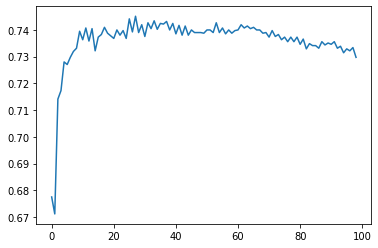

In [202]:
#Plot the accuracy for each K values
import matplotlib.pyplot as plt

plt.figure()
plt.plot(My_list)

#### Answer

This model quicly reaches its prime at aroun k = 20 with a score of 74.5% on the test data, I would use an odd number so k= 21 just as best practice to avoid tie results when fitting data to the model. 

### Q 2.5
-What is the issue with splitting the data into train and validation sets after performing a TF-IDF vectorization?

The main issue is that the TF_IDF "combined" the features and I'm not able to identify the features influencing each outcome anymore. I will get reliable outcome predictions, but the coeficients don't tell me much anymore. 
Also with TF-IDF that have been trainned with the entire data set ends up having information from the entire data set leak into the trainning and test split. Ideally we should peform TFIDF in each set separatly.  

#### Q3 - Employ a Decision Tree classifier on this dataset:
##### Q3.1- Fit a decision tree model to this data. What is the accuracy score on the test set?

I will continue to use the TFIDF data just to eliminate computing time

In [203]:
# X and y are already defined above
from sklearn.tree import DecisionTreeClassifier

#Fit the model (notice we've let the depth become unbounded)
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [204]:
#Fit to the training data
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.6708984375


#### Q3.2 - Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

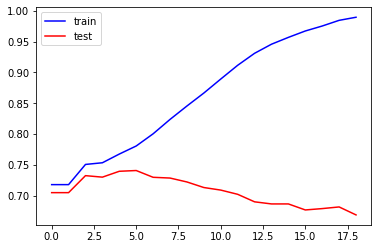

In [205]:
#set a list of values
myrange= list(range(1,20))  
# empty lists to store my results
Train_results =[]
Test_results =[]

for i in myrange:
    #Fit to the training data
    DT_model = DecisionTreeClassifier(max_depth=i)
    DT_model.fit(X_train, y_train)

    R=  DT_model.score(X_train,y_train)
    T=  DT_model.score(X_test,y_test)
    
    Train_results.append(R)
    Test_results.append(T)  

# Plot the scores for train and test sets. 
plt.figure()
plt.plot(Train_results, c='blue', label = 'train')
plt.plot(Test_results, c='red', label = 'test')
plt.legend()
plt.show()

In [206]:
# Above query was pretty fast, so let's try with the full data set. 
# For this I will not scale the data as it's not required for decision trees
 # redefine X with full data set
Train = pd.read_csv('data/train_dataframe.csv')

# in this case the test file will be my actual test set.
# the testtrain file split will provide a validation test

Test = pd.read_csv('data/test_dataframe.csv')

# define X and y - t for train set
yt = Train['Reviewer_Score']#only my target
Xt= Train.drop('Reviewer_Score', axis=1)

In [207]:
# Split the data
from sklearn.model_selection import train_test_split
X_traint, X_valt, y_traint, y_valt = train_test_split(Xt, yt, test_size=0.3)

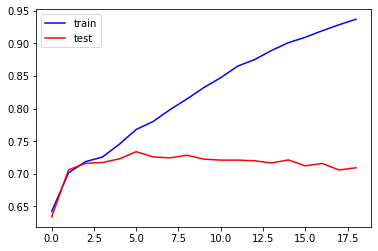

In [208]:
myrange=list(range(1,20))
Train_results =[]
Val_results =[]

for i in myrange:
    #Fit to the training data
    DT_model = DecisionTreeClassifier(max_depth=i)
    DT_model.fit(X_traint, y_traint)

    R=  DT_model.score(X_traint,y_traint)
    T=  DT_model.score(X_valt,y_valt)
    
    Train_results.append(R)
    Val_results.append(T)  

# Plot the scores for train and test sets. 
plt.figure()
plt.plot(Train_results, c='blue', label = 'train')
plt.plot(Val_results, c='red', label = 'test')
plt.legend()
plt.show()

#not really a lot of improvement here. The reason is that decision trees already exclude unimportant features. demnonstrated here by the very similar results from full dataset and TF_IDF data set. 

###### Seems that the optimal value for max_deph in this data set is 3. That is just about the maximum score on the test data and before we start overfitting on the train data. 


#### Q3.3 - Provide two advantages of decision trees over KNN.

#### Advantages over KNN
- Much faster than KNN
- Easy to interpret
- excludes unimportant features on it's own as demonstrated previously. 


#### Q4 - What is the purpose of the validation set, i.e., how is it different than the test set?

 - The validation set is used to tune the hyperparameters of the classifier. 
 
 The trainning set is used to build the classifier,  the validation set is used to test it and check for overfitting by comparing results, finally the test set is the completly unseen data, it will give more reliable results to the score of "real world data". 

#### 5 - Re-run a decision tree or logistic regression on the data again:

- 1. Perform a 5-fold cross validation to optimize the hyperparameters of your model.
 - I will use DecisionTree Classifier because it is running much faster on this data set

In [211]:
#I will use Xt and yt defined in last part
print(Xt.shape)
print(yt.shape)

(13651, 2586)
(13651,)


In [215]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [226]:
#Check my cross val function on my decisiontreee and set cv=5 for 5 folds
# Cross validation should return 5 results, it's the equivalent of loopoing thru the model
#several times and storing the results
# CV determined the K Fold
#n_jobs=-1 will allow my computer to use all its cores and reduce computing time.

scores = cross_val_score(DecisionTreeClassifier(max_depth=3),X,y, n_jobs=-1,cv=5)

In [229]:
scores

array([0.74917613, 0.73709264, 0.75723178, 0.74312935, 0.74349579])

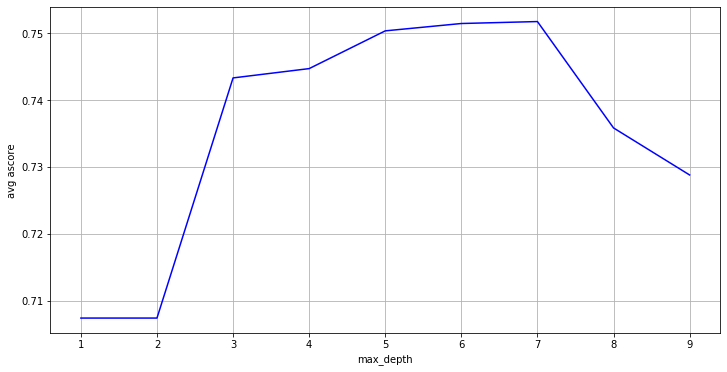

In [251]:
from statistics import mean # need this to get the mean for each iteration 
#try to optimize max_depth again
myrange=list(range(1,10))
sc = []
depth = []
for i in myrange:
    score = cross_val_score(DecisionTreeClassifier(max_depth=i, criterion='entropy'),X,y, n_jobs=-1,cv=10)
    
    depth.append(i)
    #append just the mean of the 5 scores returned at each loop
    sc.append(mean(score))
# Plot the scores for train and test sets. 
plt.figure(figsize=(12,6))
plt.plot(depth,sc, c='blue', label = 'average score')
plt.xlabel('max_depth')
plt.ylabel('avg ascore')
plt.grid()
plt.show()    

Again the optimun score is at max_depth at around 3 and 5 - I think now we can use 5 as the best Max_depth, as it is just one step before it starts to loose accuracy.

### Q. 5.2

 - What does your confusion matrix look like for your best model on the test set?

In [280]:
#Use my decision tree with optimun parameters, max _depth =5
DT_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
#Fit
DT_model.fit(X_train, y_train)
#Predict response
y_pred = DT_model.predict(X_test)

In [281]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

#confusion_matrix(actual VS predicted)

conf = confusion_matrix(y_test, y_pred)
conf

array([[1316,  399],
       [ 665, 1716]], dtype=int64)

In [273]:
pd.DataFrame(conf)

,0,1
0,1316,399
1,665,1716


 - 1316 ZEROS PREDICTED AS ZEROS, while 399 where INCORRECTLY predicted as ones
 - 665 ones were INCORRECTLY predicted as zeros, while 1716 ONES PREDICTED AS ONES

#### 6 - Create one new feature of your choice:
 - Explain your new feature and why you consider it will improve accuracy.

I will use the negative and positive word counts divided by each other to create a positive word ratio. 
This should be a good indicator of sentiment. People who put time into writing more on the positive review than on the negative review are more likely to give a good review score, I assume.

In [314]:
#I will devide by the count of negative words
# I might be in trouble if that value is 0
Train['Review_Total_Negative_Word_Counts'].min()

0.0

In [315]:
# when deviding by 0 the value returned is Inf. I'll make al inf =0, as in the ratio of positive words is 0.00
# set inf to be NA
pd.set_option('use_inf_as_na', True)
# check my ratio
Train['PwordRatio'] = Train['Review_Total_Positive_Word_Counts']/Train['Review_Total_Negative_Word_Counts']

In [316]:
# Fill na with 0
Train['PwordRatio'].fillna(value=1, inplace=True)

In [317]:
print(f'Max positive word ratio {Train["PwordRatio"].max()}')
print(f'Min positive word ratio {Train["PwordRatio"].min()}')

Max positive word ratio 105.0
Min positive word ratio 0.0


In [318]:
Train["PwordRatio"]

0        1.050000
1        4.600000
2        0.333333
3        0.764706
4        0.000000
           ...   
13646    0.145455
13647    1.000000
13648    0.622222
13649    1.500000
13650    1.000000
Name: PwordRatio, Length: 13651, dtype: float64

In [319]:
Train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,Review_Day,Review_Year,Hotel_Name_11 Cadogan Gardens,Hotel_Name_41,Hotel_Name_45 Park Lane Dorchester Collection,Hotel_Name_88 Studios,Hotel_Name_Ace Hotel London Shoreditch,Hotel_Name_Adria Boutique Hotel,Hotel_Name_Aloft London Excel,Hotel_Name_Amba Hotel Charing Cross,Hotel_Name_Amba Hotel Marble Arch,Hotel_Name_Ambassadors Bloomsbury,Hotel_Name_Andaz London Liverpool Street,Hotel_Name_Apex City Of London Hotel,Hotel_Name_Apex London Wall Hotel,Hotel_Name_Apex Temple Court Hotel,Hotel_Name_Arbor City,Hotel_Name_Arbor Hyde Park,Hotel_Name_Ashburn Hotel,Hotel_Name_Avo Hotel,Hotel_Name_BEST WESTERN Maitrise Hotel Maida Vale,Hotel_Name_Baglioni Hotel London The Leading Hotels of the World,Hotel_Name_Batty Langley s,Hotel_Name_Bentley London,Hotel_Name_Bermondsey Square Hotel A Bespoke Hotel,Hotel_Name_Best Western Maitrise Hotel Edgware Road,Hotel_Name_Best Western Mornington Hotel Hyde Park,Hotel_Name_Best Western PLUS Epping Forest,Hotel_Name_Best Western Palm Hotel,Hotel_Name_Best Western Plus Seraphine Hammersmith Hotel,Hotel_Name_Best Western Seraphine Kensington Olympia,Hotel_Name_Best Western The Boltons Hotel London Kensington,Hotel_Name_Blakemore Hyde Park,Hotel_Name_Blakes Hotel,Hotel_Name_Bloomsbury Palace Hotel,Hotel_Name_Boundary Rooms Suites,Hotel_Name_Britannia International Hotel Canary Wharf,Hotel_Name_Bulgari Hotel London,Hotel_Name_COMO Metropolitan London,Hotel_Name_COMO The Halkin,Hotel_Name_Caesar Hotel,Hotel_Name_Canary Riverside Plaza Hotel,Hotel_Name_Charlotte Street Hotel,Hotel_Name_Chiswick Rooms,Hotel_Name_Claridge s,Hotel_Name_Clayton Crown Hotel London,Hotel_Name_Clayton Hotel Chiswick,Hotel_Name_Club Quarters Hotel Gracechurch,Hotel_Name_Club Quarters Hotel Lincoln s Inn Fields,Hotel_Name_Club Quarters Hotel St Paul s,Hotel_Name_Club Quarters Hotel Trafalgar Square,Hotel_Name_Comfort Inn Suites Kings Cross St Pancras,Hotel_Name_Commodore Hotel,Hotel_Name_Conrad London St James,Hotel_Name_Copthorne Tara Hotel London Kensington,Hotel_Name_Corinthia Hotel London,Hotel_Name_Corus Hotel Hyde Park,Hotel_Name_Courthouse Hotel London,Hotel_Name_Courthouse Hotel Shoreditch,Hotel_Name_Covent Garden Hotel,Hotel_Name_Crowne Plaza London Battersea,Hotel_Name_Crowne Plaza London Docklands,Hotel_Name_Crowne Plaza London Ealing,Hotel_Name_Crowne Plaza London Kensington,Hotel_Name_Crowne Plaza London Kings Cross,Hotel_Name_Crowne Plaza London The City,Hotel_Name_Danubius Hotel Regents Park,Hotel_Name_De Vere Devonport House,Hotel_Name_Dorset Square Hotel,Hotel_Name_Dorsett Shepherds Bush,Hotel_Name_DoubleTree By Hilton London Excel,Hotel_Name_DoubleTree by Hilton Hotel London Marble Arch,Hotel_Name_DoubleTree by Hilton Hotel London Tower of London,Hotel_Name_DoubleTree by Hilton London Chelsea,Hotel_Name_DoubleTree by Hilton London Docklands Riverside,Hotel_Name_DoubleTree by Hilton London Ealing,Hotel_Name_DoubleTree by Hilton London Hyde Park,Hotel_Name_DoubleTree by Hilton London Islington,Hotel_Name_DoubleTree by Hilton London Victoria,Hotel_Name_DoubleTree by Hilton London West End,Hotel_Name_DoubleTree by Hilton London Westminster,Hotel_Name_Doubletree By Hilton London Greenwich,Hotel_Name_Doubletree by Hilton London Kensington,Hotel_Name_Draycott Hotel,Hotel_Name_Durrants Hotel,Hotel_Name_Eccleston Square Hotel,Hotel_Name_Egerton House,Hotel_Name_Fielding Hotel,Hotel_Name_Fifty Four Boutique Hotel,Hotel_Name_Flemings Mayfair,Hotel_Name_Four Seasons Hotel London at Park Lane,Hotel_Name_Gainsborough Hotel,Hotel_Name_Georgian House Hotel,Hotel_Name_Good Hotel London,Hotel_Name_Goodenough Club,Hotel_Name_Grand Royale London Hyde Park,Hotel_Name_Grange Beauchamp Hotel,Hotel_Name_Grange Blooms Hotel,Hotel_Name_Grange Buckingham Hotel,Hotel_Name_Grange City Hotel,Hotel_Name_Grange Clarendon Hotel,Hot

#### Q6.2  - Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

Since I set a new data frame I need to reset my split as well


In [320]:
# define X and y - t for train set
y = Train['Reviewer_Score']#only my target
X= Train.drop('Reviewer_Score', axis=1)

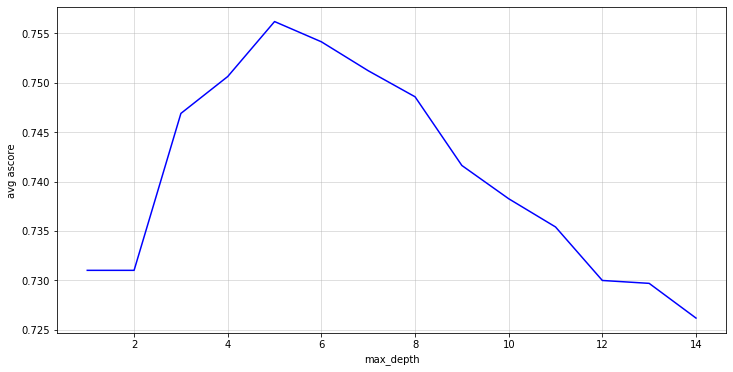

In [321]:

#try to optimize max_depth again
myrange=list(range(1,15))
sc = []
depth = []
for i in myrange:
    score = cross_val_score(DecisionTreeClassifier(max_depth=i, criterion='entropy'),X,y, n_jobs=-1,cv=5)
    
    depth.append(i)
    #append just the mean of the 5 scores returned at each loop
    sc.append(mean(score))
# Plot the scores for train and test sets. 
plt.figure(figsize=(12,6))
plt.plot(depth,sc, c='blue', label = 'average score')
plt.xlabel('max_depth')
plt.ylabel('avg ascore')
plt.grid(alpha=0.5)
plt.show() 

#### Has the accuracy score of your best model improved on the test set after adding the new feature you created?

- The Score does not change all that much.

- This data set already has many features. To improve the score ideally we should identify the main features and use those, instead of relying on a set with so much noise